In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
bg=np.zeros((500,500,3),np.uint8)

In [5]:
bg[:]=[0,255,0]

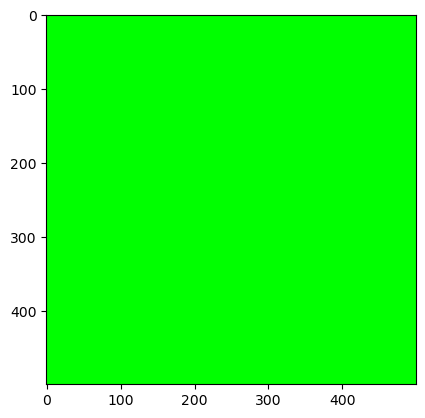

In [7]:
plt.imshow(bg)

In [9]:
bg.shape

(500, 500, 3)

In [11]:
bg[100:400,100:400]=[0,0,255]

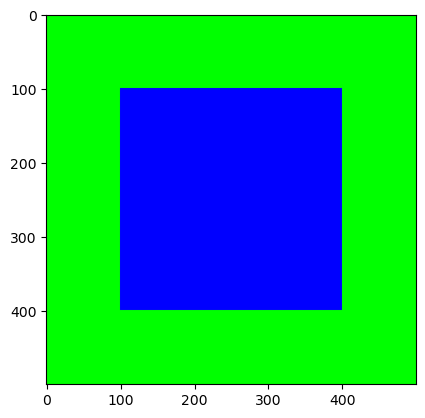

In [13]:
plt.imshow(bg)

In [15]:
bg[150:400,150:450]=[0,255,255]

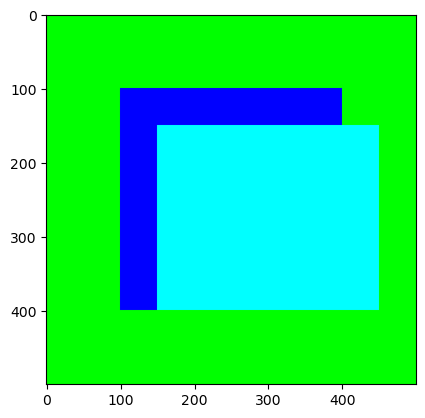

In [17]:
plt.imshow(bg)

In [19]:
bg=cv2.rectangle(bg,(100,400),(400,100),(255,255,255),thickness=1)

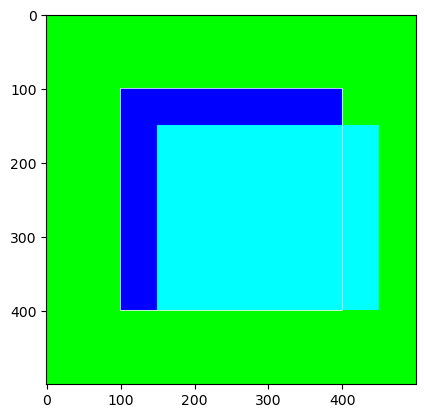

In [21]:
plt.imshow(bg)

In [23]:
bg=cv2.rectangle(bg,(100,400),(400,100),(0,0,0),thickness=-1)

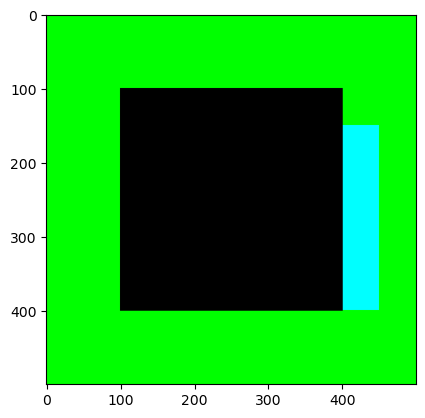

In [25]:
plt.imshow(bg)

In [27]:
bg=cv2.circle(bg,(bg.shape[0]//2,bg.shape[1]//2),100,(100,100,100),thickness=2)

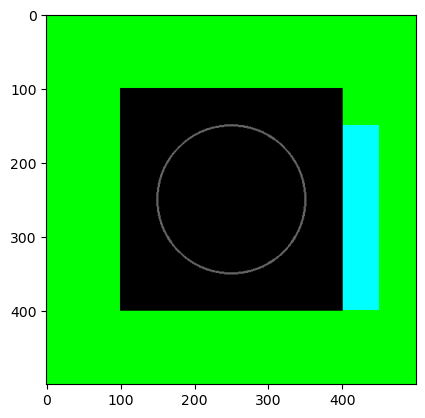

In [29]:
plt.imshow(bg)

In [31]:
bg=cv2.circle(bg,(bg.shape[0]//2,bg.shape[1]//2),100,(100,100,100),thickness=-1)

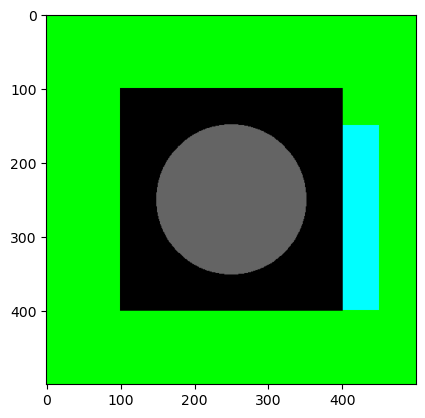

In [33]:
plt.imshow(bg)

In [35]:
bg=cv2.line(bg ,(100,400),(400,100),(255,255,255),thickness=2)

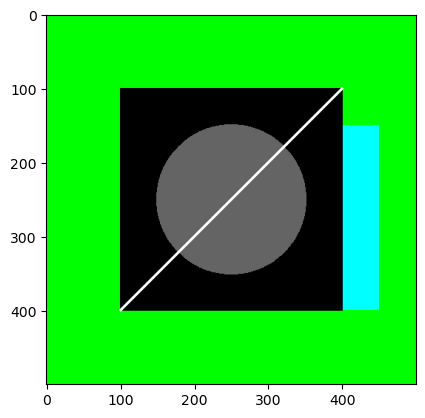

In [37]:
plt.imshow(bg)

In [39]:
bg=cv2.putText(bg,"the ART",(50,150),color=(200,0,0),thickness=2,fontScale=1.1,fontFace=cv2.FONT_HERSHEY_TRIPLEX)

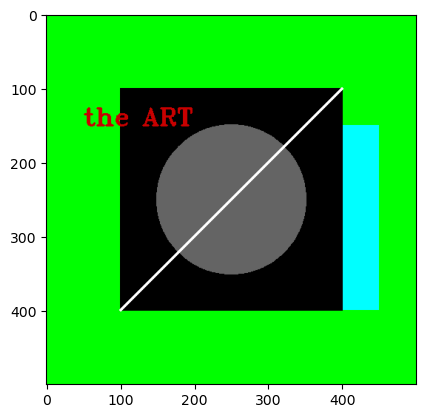

In [41]:
plt.imshow(bg)

In [112]:
bg=cv2.putText(bg,"the artist",(100,400), color=(255,255,255),fontScale=1.0,fontFace=cv2.FONT_HERSHEY_COMPLEX,thickness=2)

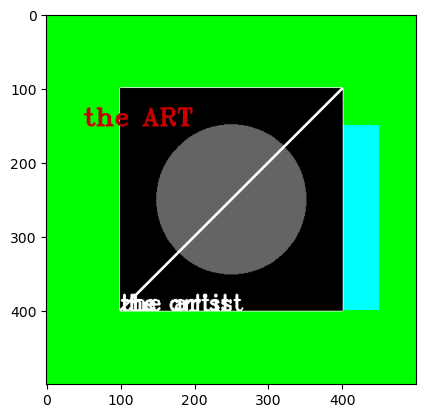

In [114]:
plt.imshow(bg)

In [1]:
import cv2
import numpy as np

COLOR DETECTION

In [4]:
img=cv2.imread("sample_image.jpg")

In [6]:
img1=cv2.resize(img,(600,600))

In [7]:
cv2.imshow("sample image",img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
hsv=cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)

In [11]:
cv2.imshow("hsv image",hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
redl=np.array([135,85,110],np.uint8)
redh=np.array([185,250,250],np.uint8)
rmask=cv2.inRange(hsv,redl,redh)


In [15]:
cv2.imshow("mask image",rmask)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
kernel=np.ones((5,5),np.uint8)
redm=cv2.dilate(rmask,kernel,iterations=1)

In [19]:
cv2.imshow("mask image",redm)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
red=cv2.bitwise_and(img1,img1,mask=redm)
cv2.imshow("bitwise",red)
cv2.waitKey(0)
cv2.destroyAllWindows()
cont,hier=cv2.findContours(redm,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(cont)

(array([[[203, 466]],

       [[203, 470]],

       [[212, 470]],

       [[212, 466]]], dtype=int32), array([[[315, 460]],

       [[315, 464]],

       [[319, 464]],

       [[319, 460]]], dtype=int32), array([[[290, 350]],

       [[290, 354]],

       [[294, 354]],

       [[294, 350]]], dtype=int32), array([[[243, 348]],

       [[243, 353]],

       [[250, 353]],

       [[250, 349]],

       [[248, 349]],

       [[247, 348]]], dtype=int32), array([[[262, 341]],

       [[262, 345]],

       [[270, 345]],

       [[270, 341]]], dtype=int32), array([[[295, 336]],

       [[295, 341]],

       [[294, 342]],

       [[293, 342]],

       [[293, 346]],

       [[297, 346]],

       [[297, 342]],

       [[298, 341]],

       [[299, 341]],

       [[299, 336]]], dtype=int32), array([[[244, 334]],

       [[244, 340]],

       [[248, 340]],

       [[248, 339]],

       [[249, 338]],

       [[249, 334]]], dtype=int32), array([[[311, 333]],

       [[311, 334]],

       [[310, 335]],


In [18]:
for pic , cont in enumerate(cont):
    area=cv2.contourArea(cont)
    if(area>100):
        x,y,w,h=cv2.boundingRect(cont)
        img1=cv2.rectangle(img1,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.putText(img1,"Red color",(x,y),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1.0,color=(255,0,0),thickness=1)
while(1):
    cv2.imshow("redcolor",img1)
    key=cv2.waitKey(1)
    if(key==ord("q")):
        cv2.destroyAllWindows()
        break

DETECTING BLUE IN WEBCAM

restart kernel

In [2]:
import cv2
import numpy as np

STEPS ARE 

1. read the we cam bgr frame
2. convert it into hsv
3. find the lower and higher ranges of the colour and create a mask of the colour
4. use kernel and dilate the mask
5. use bitwixe_and find contours and find the area of each contour point the contours

In [12]:
video= cv2.VideoCapture(0)
bll=np.array([95,85,5],np.uint8)
blu=np.array([115,250,250],np.uint8)
kernel=np.ones((2,2),np.uint8)
while(1):
    ret,frame=video.read()
    hsv=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    blm=cv2.inRange(hsv,bll,blu)
    hsv=cv2.dilate(hsv,kernel,iterations=1)
    masked=cv2.bitwise_and(frame,frame,mask=blm)
    cont,hier=cv2.findContours(blm,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    for each in cont:
        area=cv2.contourArea(each)
        if(area>400):
            x,y,w,h=cv2.boundingRect(each)
            cv2.rectangle(frame,(x,y),(x+w,y+h),color=(200,200,200),thickness=2)
            cv2.putText(frame,"Blue object",org=(x-10,y-10),color=(200,100,100),fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale=1.1,thickness=2)
    cv2.imshow("BLUE COLOR DETECTION",frame)
    k=cv2.waitKey(1)
    if(k==ord(' ')):
        break
video.release()
cv2.destroyAllWindows()

In [ ]:
video.release()
cv2.destroyAllWindows()